In [1]:
import pandas
import configparser 
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']


In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

In [4]:
sql = """ select * from student
             """

In [5]:
df = pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_13355/647199877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,GS
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


In [10]:
cur = conn.cursor()

In [11]:
sql = """  insert into student(s_email,s_name,major)
            values('{}','{}','{}')
            """.format('s5@jmu.edu','s5','IA')

print(sql)

  insert into student(s_email,s_name,major)
            values('s5@jmu.edu','s5','IA')
            


In [ ]:
cur.execute(sql)

In [33]:
conn.commit()

In [22]:
conn.rollback()

In [35]:
cur.close()

In [36]:
conn.close()

In [13]:
sql = """
select professor.p_name, course.c_name
from professor
inner join course
on professor.p_email = course.p_email
"""

In [14]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_13355/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter
3,p4,linkedin


In [15]:
sql = """
select c_number, count(*) as num_student
from enroll
group by c_number
order by num_student desc
"""

/tmp/ipykernel_13355/4196399643.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)
Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='c_number'>

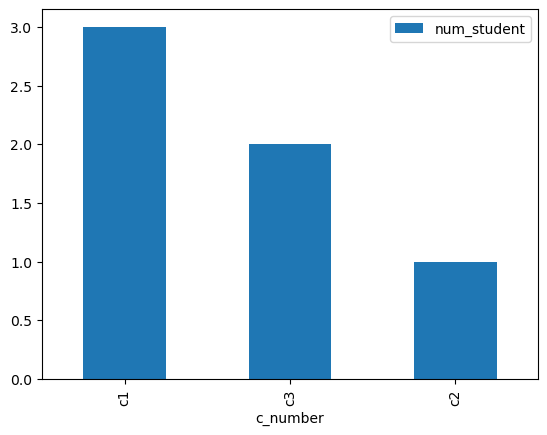

In [16]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x = 'c_number' , y = 'num_student')

In [17]:
sql = """
select professor.p_name, count(course.c_number) as num_course_taught
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name
order by num_course_taught desc
"""

/tmp/ipykernel_13355/4248120886.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

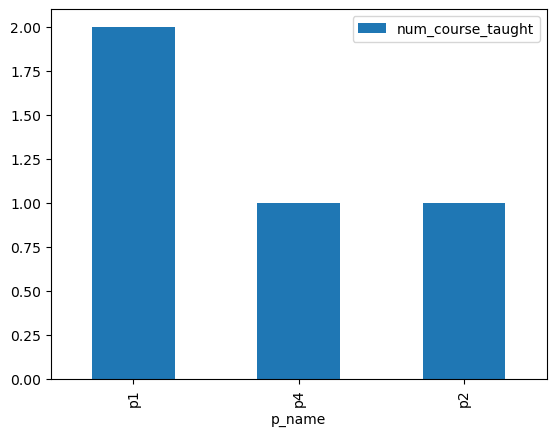

In [18]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x = 'p_name', y = 'num_course_taught')

In [23]:
cur = conn.cursor()

In [20]:
sql = """
insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4')
"""

In [ ]:
cur.execute(sql)

In [24]:
conn.commit()

In [25]:
df = pandas.read_sql_query('select* from professor',conn)
df[:]

/tmp/ipykernel_13355/1131370968.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select* from professor',conn)


,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p4@jmu.edu,p4,o4


In [48]:
sql = """
insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')
"""

In [ ]:
cur.execute(sql)

In [ ]:
conn.commit()

In [26]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_13355/2981575292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
